In [1]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
perfiles_sqr = pd.read_parquet('../data/processed/perfiles_sqr_filtrado_not_filtered.parquet')

perfiles_sqr['IMC'] = perfiles_sqr['peso'] / (perfiles_sqr['altura']/100)**2
perfiles_sqr['IMC_cat'] = pd.cut(perfiles_sqr['IMC'], bins=[0, 25, 30, 50],
                                include_lowest=True,labels=['Bajo peso', 'Normal', 'Sobrepeso'])

In [4]:
perfiles_sqr['horas_sueño'] = ((perfiles_sqr.fechaFin - perfiles_sqr.fechaInicio) / np.timedelta64(1, 's'))/3600

In [5]:
perfiles_sqr['horas_sueño'].describe()

count    37111.000000
mean         7.323466
std          4.601039
min          2.000556
25%          6.111528
50%          7.298611
75%          8.365694
max        325.590556
Name: horas_sueño, dtype: float64

In [6]:
perfiles_sqr['horas_int'] = perfiles_sqr['horas_sueño'].astype(int)

In [7]:
perfiles_sqr['horas_int'] = perfiles_sqr['horas_int'].apply(lambda x: str(x) if x < 8 else str(8))

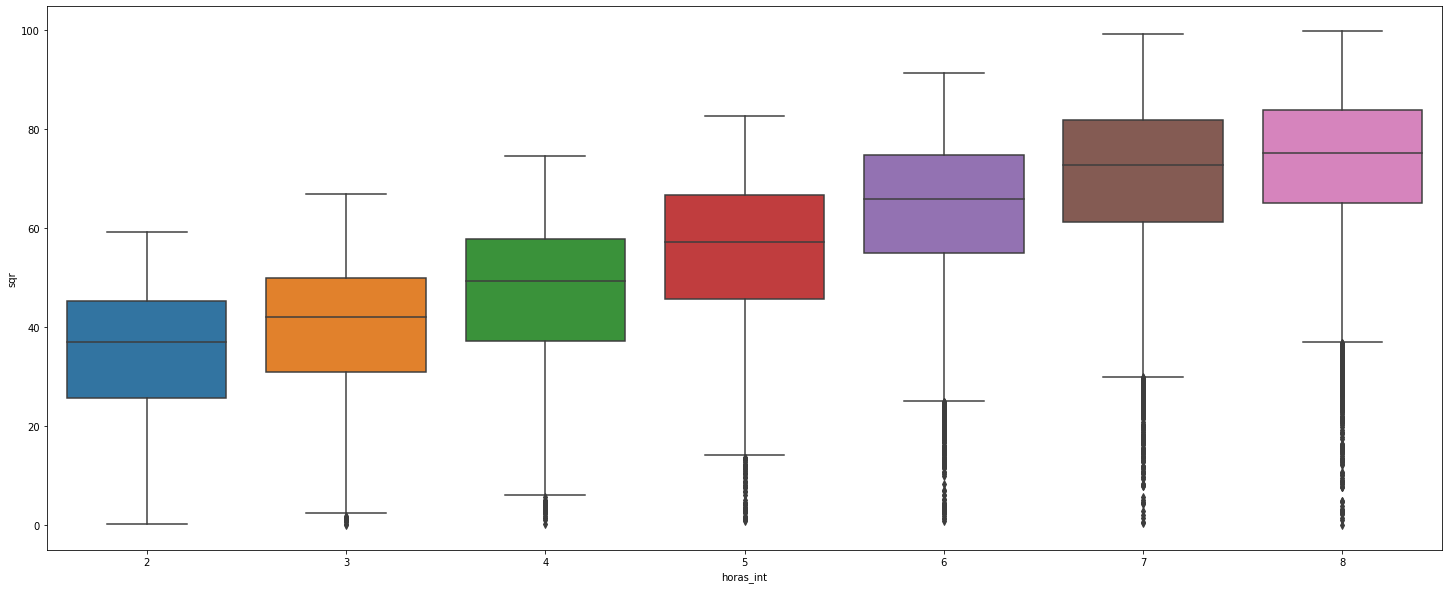

In [8]:
plt.figure(figsize=(25,10))
ax = sns.boxplot(x="horas_int", y="sqr", data=perfiles_sqr)

In [95]:
perfiles_sqr[['sqr', 'horas_int', 'sexo', 'posicion', 'IMC_cat']].to_csv('perfiles_sqr.csv', index = False)

In [14]:
%%R -i perfiles_sqr
anova <- aov(sqr ~ horas_int*sexo*posicion*IMC_cat, data = perfiles_sqr)
summary(anova)

                                   Df  Sum Sq Mean Sq  F value   Pr(>F)    
horas_int                           6 4752788  792131 3470.194  < 2e-16 ***
sexo                                1   30511   30511  133.666  < 2e-16 ***
posicion                            1   16384   16384   71.775  < 2e-16 ***
IMC_cat                             2   26003   13002   56.957  < 2e-16 ***
horas_int:sexo                      6   17571    2928   12.829 1.56e-14 ***
horas_int:posicion                  6    6664    1111    4.865 5.62e-05 ***
sexo:posicion                       1    2070    2070    9.066 0.002605 ** 
horas_int:IMC_cat                  12   32147    2679   11.736  < 2e-16 ***
sexo:IMC_cat                        2   32107   16054   70.329  < 2e-16 ***
posicion:IMC_cat                    2   57740   28870  126.475  < 2e-16 ***
horas_int:sexo:posicion             6    4529     755    3.307 0.002961 ** 
horas_int:sexo:IMC_cat             12    4267     356    1.558 0.096240 .  
horas_int:po

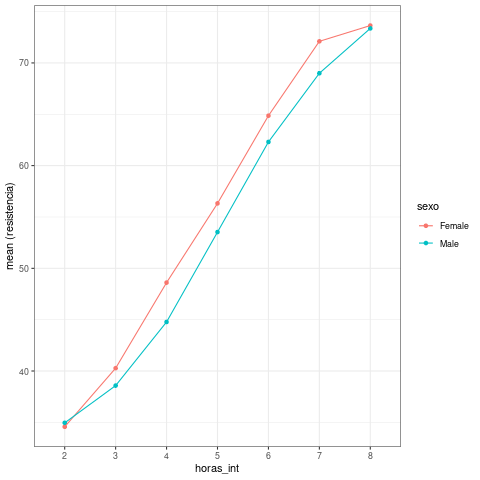

In [16]:
%%R -i perfiles_sqr
library(ggplot2)
ggplot(data = perfiles_sqr, aes(x = horas_int, y = sqr, colour = sexo, group = sexo)) + 
    stat_summary(fun = mean, geom = "point") + stat_summary(fun = mean, geom = "line") + 
    labs(y = "mean (sqr)") + theme_bw()

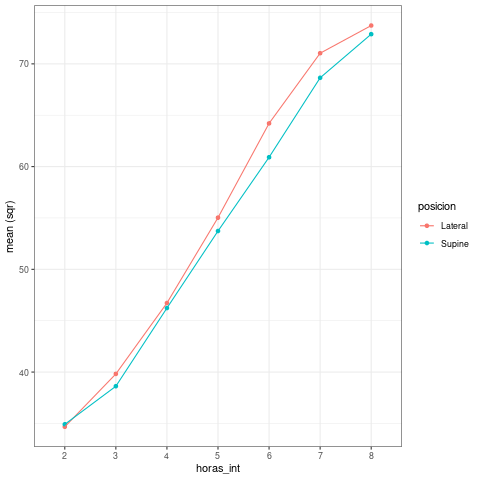

In [17]:
%%R -i perfiles_sqr
library(ggplot2)
ggplot(data = perfiles_sqr, aes(x = horas_int, y = sqr, colour = posicion, group = posicion)) + 
    stat_summary(fun = mean, geom = "point") + stat_summary(fun = mean, geom = "line") + 
    labs(y = "mean (sqr)") + theme_bw()

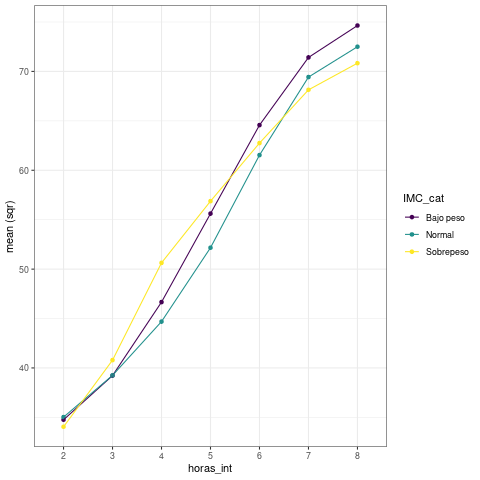

In [18]:
%%R -i perfiles_sqr
library(ggplot2)
ggplot(data = perfiles_sqr, aes(x = horas_int, y = sqr, colour = IMC_cat, group = IMC_cat)) + 
    stat_summary(fun = mean, geom = "point") + stat_summary(fun = mean, geom = "line") + 
    labs(y = "mean (sqr)") + theme_bw()